In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_parquet("../data/parquet/cleaned_data_with_cfg.parquet")

In [ ]:
def avg_line_length(code):
    lines = str(code).splitlines()
    if not lines:
        return 0
    return np.mean([len(line) for line in lines])

df['line_length'] = df['code'].apply(avg_line_length)

In [19]:
df["line_length"].describe()

count    35610.000000
mean        32.764467
std          4.055155
min          7.000000
25%         30.086957
50%         32.880000
75%         35.217391
max         81.677419
Name: line_length, dtype: float64

In [20]:
df[df['label'] == 1]['line_length'].describe()

count    29376.000000
mean        32.633334
std          3.513201
min         10.555556
25%         30.130435
50%         32.750000
75%         34.920000
max         81.677419
Name: line_length, dtype: float64

In [21]:
df[df['label'] == 0]['line_length'].describe()

count    6234.000000
mean       33.382396
std         5.942604
min         7.000000
25%        29.786200
50%        33.874640
75%        36.851172
max        80.509804
Name: line_length, dtype: float64

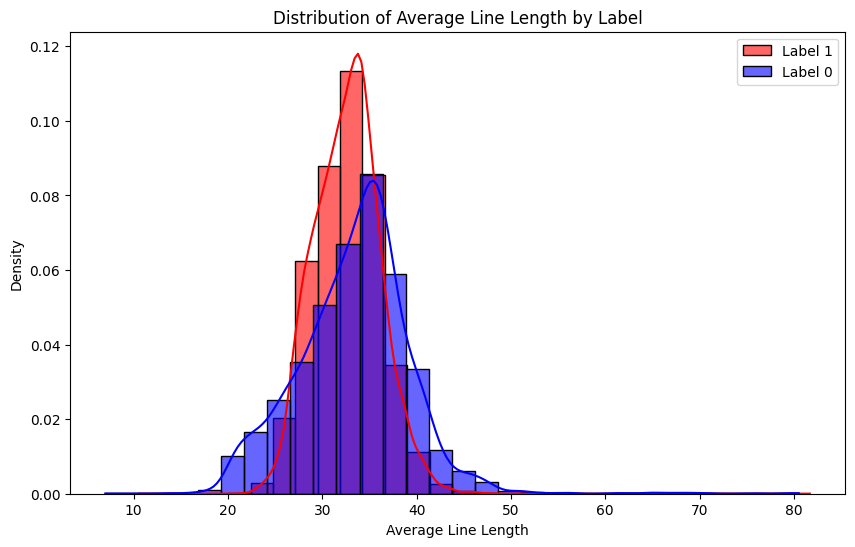

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df[df['label'] == 1]['line_length'], color='red', label='Label 1', kde=True, stat='density', bins=30, alpha=0.6)
sns.histplot(df[df['label'] == 0]['line_length'], color='blue', label='Label 0', kde=True, stat='density', bins=30, alpha=0.6)
plt.xlabel('Average Line Length')
plt.ylabel('Density')
plt.title('Distribution of Average Line Length by Label')
plt.legend()
plt.show()

In [ ]:
df['line_count'] = df['code'].apply(lambda code: len(str(code).splitlines()))

In [24]:
df["line_count"].describe()

count    35610.000000
mean        38.411766
std        128.310029
min          1.000000
25%         19.000000
50%         24.000000
75%         28.000000
max       4827.000000
Name: line_count, dtype: float64

In [25]:
df[df['label'] == 0]['line_count'].describe()

count    6234.000000
mean       85.195220
std       214.046599
min         1.000000
25%        31.000000
50%        48.000000
75%        73.000000
max      4821.000000
Name: line_count, dtype: float64

In [26]:
df[df['label'] == 1]['line_count'].describe()

count    29376.00000
mean        28.48366
std         98.35011
min          9.00000
25%         18.00000
50%         23.00000
75%         26.00000
max       4827.00000
Name: line_count, dtype: float64

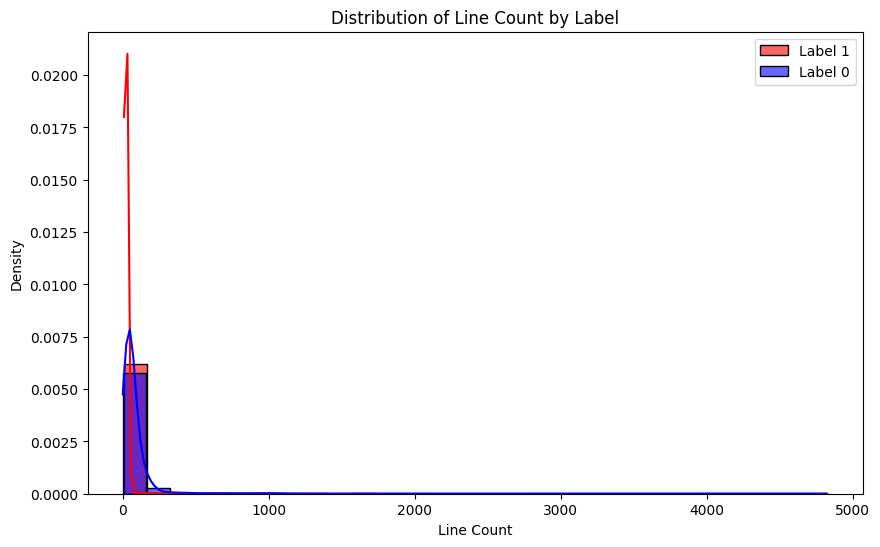

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df[df['label'] == 1]['line_count'], color='red', label='Label 1', kde=True, stat='density', bins=30, alpha=0.6)
sns.histplot(df[df['label'] == 0]['line_count'], color='blue', label='Label 0', kde=True, stat='density', bins=30, alpha=0.6)
plt.xlabel('Line Count')
plt.ylabel('Density')
plt.title('Distribution of Line Count by Label')
plt.legend()
plt.show()

In [ ]:
import ast

def avg_cfg_nodes(cfg):
    if isinstance(cfg, dict) and 'nodes' in cfg:
        return len(cfg['nodes'])
    if isinstance(cfg, str):
        try:
            cfg_dict = ast.literal_eval(cfg)
            if isinstance(cfg_dict, dict) and 'nodes' in cfg_dict:
                return len(cfg_dict['nodes'])
        except:
            print("Error parsing cfg:", cfg)
    return 0

In [ ]:
def avg_cfg_edges(cfg):
    if isinstance(cfg, dict) and 'edges' in cfg:
        return len(cfg['edges'])
    if isinstance(cfg, str):
        try:
            cfg_dict = ast.literal_eval(cfg)
            if isinstance(cfg_dict, dict) and 'edges' in cfg_dict:
                return len(cfg_dict['edges'])
        except:
            print("Error parsing cfg:", cfg)
    return 0

In [31]:
df['cfg_node_count'] = df['cfg'].apply(avg_cfg_nodes)
df['cfg_edge_count'] = df['cfg'].apply(avg_cfg_edges)

In [32]:
df["cfg_node_count"].describe()

count    35610.000000
mean        20.611064
std         65.543786
min          0.000000
25%          9.000000
50%         15.000000
75%         16.000000
max       2466.000000
Name: cfg_node_count, dtype: float64

In [33]:
df["cfg_edge_count"].describe()

count    35610.000000
mean        20.309576
std         65.103893
min          0.000000
25%          8.000000
50%         15.000000
75%         17.000000
max       2626.000000
Name: cfg_edge_count, dtype: float64